<img src="http://www3.ifmg.edu.br/site_campi/p/images/logos/Betim-Simples.png" width="700"></img>
<b>Engenharia de Controle e Automação - Redes neurais artificiais</b> - Prof. Leandro Freitas

### Lucas Pevidor Reis - 0024855 - TP2

# 1  Objetivo

Implementar uma rede neural Perceptron de única camada para fazer classificação entre duas classes distintas.


# 2 Desenvolvimento

## 2.1 Importação de bibliotecas e configuração do matplotlib:

In [1]:
%matplotlib inline

import numpy as np
import random
from matplotlib import pyplot as plt

## 2.2 Importação e verificação dos dados de entradas

In [2]:
Carro1 = np.empty((10,3), dtype=float)
Carro2 = np.empty((10,3), dtype=float)

#Ford Fusion
Carro1[0] = [17058, 99900, -1]
Carro1[1] = [16000, 103900, -1]
Carro1[2] = [44667, 104990, -1]
Carro1[3] = [47000, 107900, -1]
Carro1[4] = [19726, 124990, -1]
Carro1[5] = [19826, 116900, -1]
Carro1[6] = [17700, 118900, -1]
Carro1[7] = [28204, 119890, -1]
Carro1[8] = [17000, 120950, -1]
Carro1[9] = [22000, 123900, -1]

#Fiat Uno
Carro2[0] = [29501, 34000, 1]
Carro2[1] = [42067, 33440, 1]
Carro2[2] = [34109, 31100, 1]
Carro2[3] = [34713, 31300, 1]
Carro2[4] = [27912, 32499, 1]
Carro2[5] = [28272, 31990, 1]
Carro2[6] = [26733, 32990, 1]
Carro2[7] = [24990, 33660, 1]
Carro2[8] = [16000, 33800, 1]
Carro2[9] = [15000, 35900, 1]

Entrada = np.append(Carro1, Carro2, axis=0)

Para que uma rede Percéptron consiga distinguir as classes, elas devem ser linearmente separáveis. 

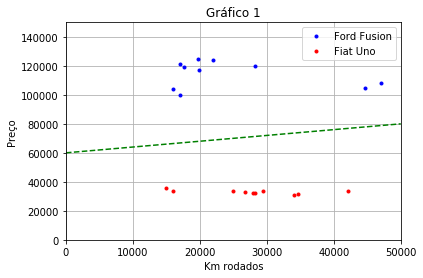

In [3]:
plt.figure()
plt.plot(Carro1[:,0], Carro1[:,1], '.b', label='Ford Fusion')
plt.plot(Carro2[:,0], Carro2[:,1], '.r', label='Fiat Uno')
plt.plot([0,50000], [60000, 80000], '--g')
plt.axis([0,50000,0,150000])
plt.grid(True)
plt.xlabel('Km rodados')
plt.ylabel('Preço')
plt.title('Gráfico 1')
plt.legend()
plt.show()

Conforme mostrado no Gráfico 1, é possível separar os dois carros utilizando uma reta. Portanto, é possível criar uma rede Percéptron capaz de distinguir os dois carros.

## 2.3 Normalização dos dados de entrada

Antes de entrar com os dados de entrada na rede Percéptron eles devem ser normalizados. A normalização dos dados foi feita utilizando o método do desvio padrão, dado pela fórmula:

$x_{norm} = \frac{x - m}{\sigma}$

onde $m$ é a média dos valores das entradas e $\sigma$ é o desvio padrão das amostras.

Média: (26423.9, 73644.95) :: DesvPad: (9637.17866857308, 41049.52252520728)

Média normalizada: (-1.887379141862766e-16, 6.661338147750939e-17) 
Variância normalizada: (0.9999999999999998, 1.0000000000000002)


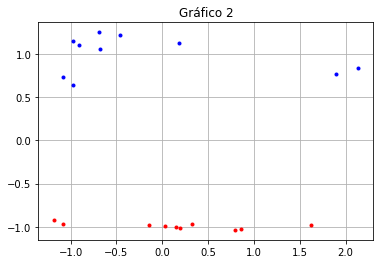

In [4]:
Entrada_media = (np.mean(Entrada[:,0]), np.mean(Entrada[:,1]))
Entrada_desvPad = (np.sqrt(np.var(Entrada[:,0])), np.sqrt(np.var(Entrada[:,1])))

Entrada_norm = np.append(np.transpose([(Entrada[:,0] - Entrada_media[0]) / Entrada_desvPad[0]]),
                         np.transpose([(Entrada[:,1] - Entrada_media[1]) / Entrada_desvPad[1]]), axis=1)

Entrada_norm = np.append(Entrada_norm, np.transpose([Entrada[:,2]]), axis=1) #Adiciona coluna de identificação dos carros

print('Média: {} :: DesvPad: {}'.format(Entrada_media, Entrada_desvPad))
print('\nMédia normalizada: {} \nVariância normalizada: {}'.format(
        (np.mean(Entrada_norm[:,0]), np.mean(Entrada_norm[:,1])),
        (np.var(Entrada_norm[:,0]), (np.var([Entrada_norm[:,1]])))))

plt.figure()
plt.plot(Entrada_norm[:10,0], Entrada_norm[:10,1], '.b')
plt.plot(Entrada_norm[10:,0], Entrada_norm[10:,1], '.r')
plt.grid(True)
plt.title('Gráfico 2')
plt.show()

## 2.4 Vetor de pesos para separação dos dados

Observando o Gráfico 2 conclui-se que para separar os dados pode-se utilizar um vetor $(0, -0.5)$. Com o vetor nesta forma, a saída desejada se torna 1 para os Fiat Uno e -1 para os Ford Fusion.

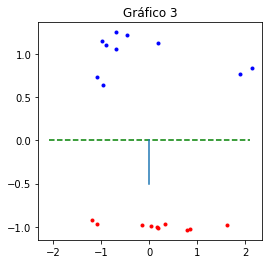

In [5]:
#x1 = np.linspace(-2.1,2.1,2)
w = [0, -0.5]
#x2 = (-1*x1*w[0])/w[1]

def plotarSeparacao(entrada1, pesos, titulo):
    plt.figure(figsize=(4,4))
    for el in entrada1:
        if el[2] == -1:
            plt.plot(el[0], el[1], '.b')
        else:
            plt.plot(el[0], el[1], '.r')

    plt.title(titulo)
    
    x1 = np.array([-2.1, 2.1])
    x2 = (-1*x1*pesos[0])/pesos[1]
    plt.plot(x1, x2, '--g')
    plt.plot([0, pesos[0]], [0, pesos[1]])
    plt.show()
    
plotarSeparacao(Entrada_norm, [0, -0.5], 'Gráfico 3')

## 2.5 Implementação e execução do algoritmo de aprendizagem

Visto que o algoritmo de aprendizagem necessita identificar o valor de saída com base em uma entrada, esta verificação deve ser implementada primeiro.

In [6]:
def encontrar_saida(vetor_peso, vetor_entrada):
    c = np.dot(vetor_peso, vetor_entrada[:2])/np.linalg.norm(vetor_peso)/np.linalg.norm(vetor_entrada)    
    angulo = np.arccos(np.clip(c, -1, 1))
    angulo = angulo*180/np.pi
    if angulo < 90 and angulo > -90:
        return 1
    return -1

O algorítmo acima encontra o valor da saída com base no ângulo entre o vetor de entrada e o vetor de peso. Se o ângulo entre os vetores está entre -90 e 90 graus, o valor de saída é igual a 1, caso contrário é igual a -1.

A função de treinamento funciona conforme a equação:

$w(n+1) = w(n) + \Delta w$

$\Delta w = \eta (d(n)-y(n))x(n)$

A função de treinamento recebe como argumentos o vetor de pesos iniciais, o vetor de entradas, de saídas desejadas e o fator de aprendizado $\eta$.

In [7]:
def treinar(pesos_iniciais, entradas, fator_aprendizado, plotar, verificar_acertos):
    rede_treinada = False    
    vet_acertos = np.array([0])
    if np.count_nonzero(pesos_iniciais) == 0:    #Se o módulo dos pesos for nulo, iniciar com o valor especificado
        pesos_iniciais = np.array([0.1, 0.1])
    while(rede_treinada == False):
        flag_alteracao = False
        for i in range(0, len(entradas[:,0])):     
            deltaW = fator_aprendizado*(entradas[i,2]-
                        encontrar_saida(pesos_iniciais, entradas[i,:]))*entradas[i,:2]
            if np.count_nonzero(deltaW) != 0:
                if flag_alteracao == False and plotar:
                    plotarSeparacao(entradas, pesos_iniciais, ' ')
                if(verificar_acertos):
                    acertos = 0
                    for k in range(0, len(entradas[:,0])):
                        if encontrar_saida(pesos_iniciais, entradas[k, :]) == entradas[k,2]:
                            acertos += 1
                    vet_acertos = np.append(vet_acertos, acertos)
                flag_alteracao = True
                pesos_iniciais += deltaW
                if plotar:
                    plotarSeparacao(entradas, pesos_iniciais, ' ')
        if flag_alteracao==False:
            rede_treinada=True
    if verificar_acertos:
            vet_acertos = np.append(vet_acertos, 8)

    return (pesos_iniciais, vet_acertos[1:])

Execução do treinamento para 5 amostras de 8 elementos:

Amostra 1:


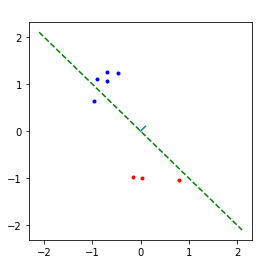

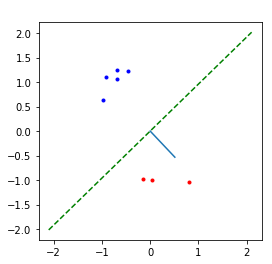

Treinamento Concluído
-------------------------------------
Amostra 2:


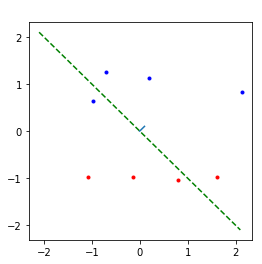

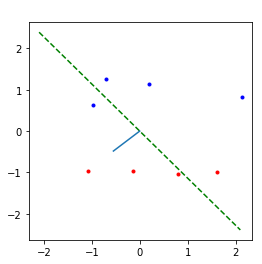

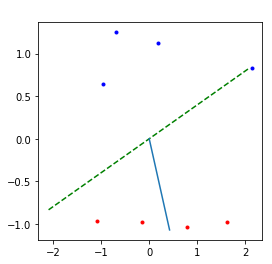

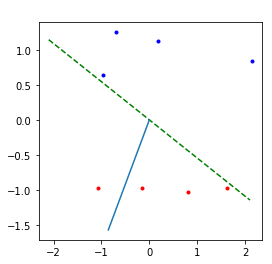

Treinamento Concluído
-------------------------------------
Amostra 3:


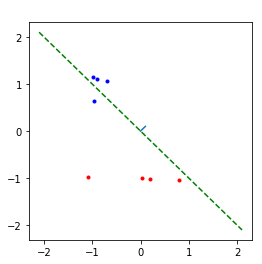

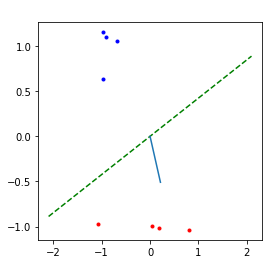

Treinamento Concluído
-------------------------------------
Amostra 4:


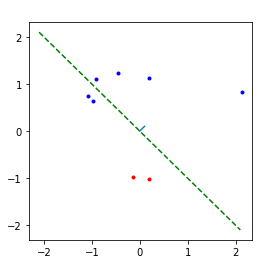

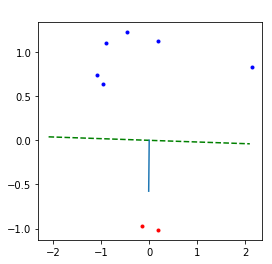

Treinamento Concluído
-------------------------------------
Amostra 5:


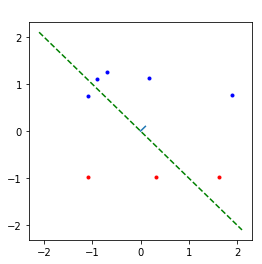

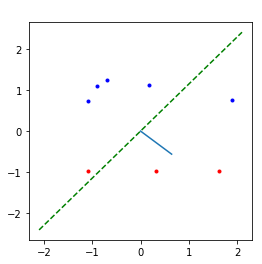

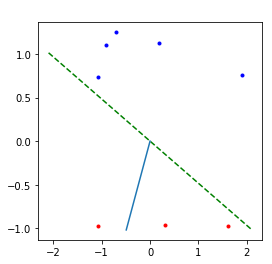

Treinamento Concluído
-------------------------------------


In [8]:

w = [0,0]
n_amostras = 8
vet_ent = np.empty([n_amostras,3])   #Vetor de amostras de entrada
vet_erros = [] #lista de erros por etapa

#Geração de amostras e treinamento da rede para fator de aprendizagem = 0.3
for n in range(5):
    k=0
    print('Amostra {}:'.format(n+1))
    for i in random.sample(range(0,19), n_amostras):    
        vet_ent[k] = Entrada_norm[i]                
        k += 1
    ret = treinar(w, vet_ent, 0.3, True, True)
    vet_erros.append(8-ret[1])
    print('Treinamento Concluído\n-------------------------------------')

Comparando o desempenho do treinamento da rede para as amostras geradas:

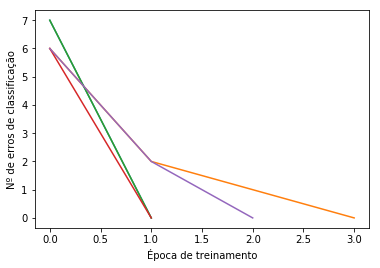

In [9]:
plt.plot(vet_erros[0])
plt.plot(vet_erros[1])
plt.plot(vet_erros[2])
plt.plot(vet_erros[3])
plt.plot(vet_erros[4])

plt.xlabel('Época de treinamento')
plt.ylabel('Nº de erros de classificação')
plt.title('')

plt.show()

Testando para fator de aprendizagem = 2:

Amostra 1:


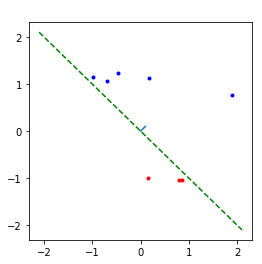

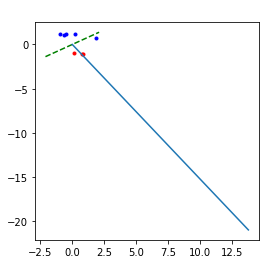

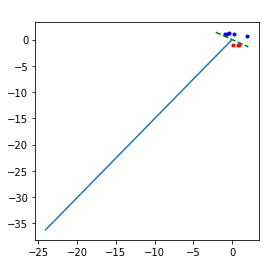

Treinamento Concluído
-------------------------------------
Amostra 2:


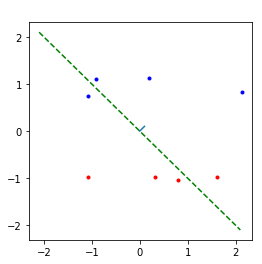

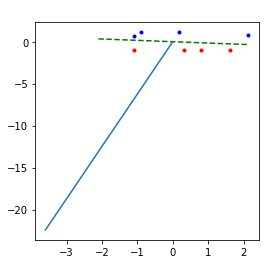

Treinamento Concluído
-------------------------------------
Amostra 3:


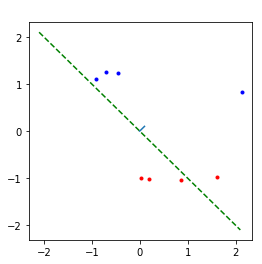

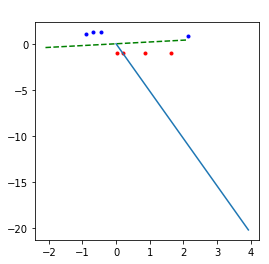

Treinamento Concluído
-------------------------------------
Amostra 4:


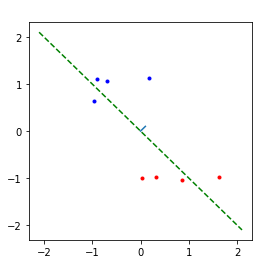

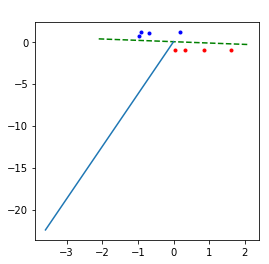

Treinamento Concluído
-------------------------------------
Amostra 5:


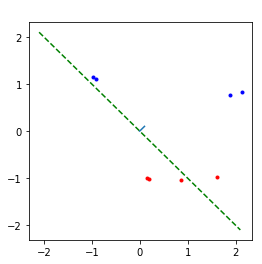

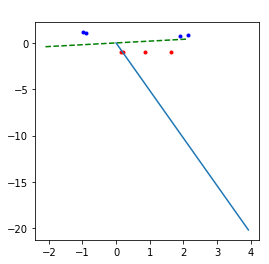

Treinamento Concluído
-------------------------------------


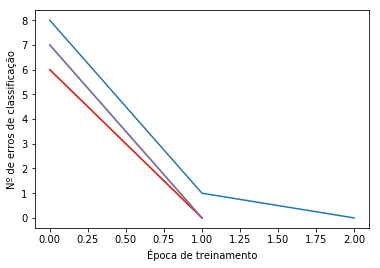

In [10]:
w = [0,0]
n_amostras = 8
vet_ent = np.empty([n_amostras,3])   #Vetor de amostras de entrada
vet_erros = [] #lista de erros por etapa

#Geração de amostras e treinamento da rede para fator de aprendizagem = 10
for n in range(5):
    k=0
    print('Amostra {}:'.format(n+1))
    for i in random.sample(range(0,19), n_amostras):    
        vet_ent[k] = Entrada_norm[i]                
        k += 1
    ret = treinar(w, vet_ent, 10, True, True)
    vet_erros.append(8-ret[1])
    print('Treinamento Concluído\n-------------------------------------')

#Gerando o gráfico de desempenho da rede
plt.plot(vet_erros[0])
plt.plot(vet_erros[1])
plt.plot(vet_erros[2])
plt.plot(vet_erros[3])
plt.plot(vet_erros[4])

plt.xlabel('Época de treinamento')
plt.ylabel('Nº de erros de classificação')
plt.title('')

plt.show()

Testando o desempenho da rede para o fator de aprendizagem = 0.02

Amostra 1:


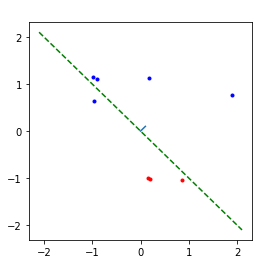

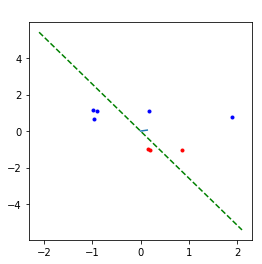

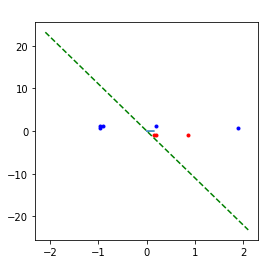

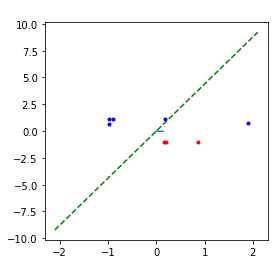

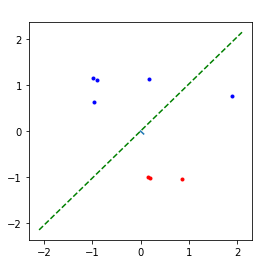

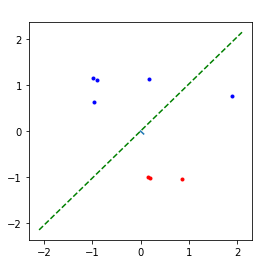

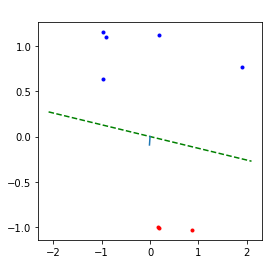

Treinamento Concluído
-------------------------------------
Amostra 2:


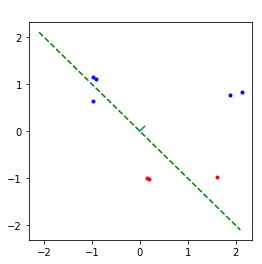

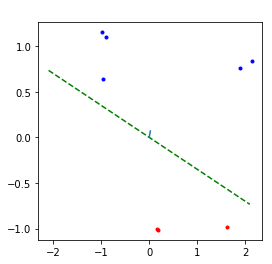

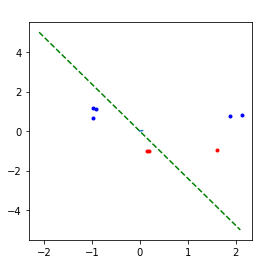

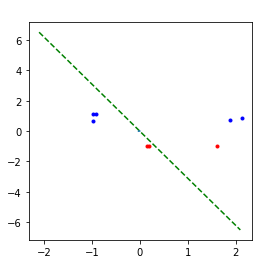

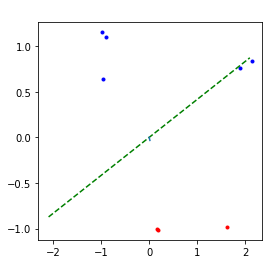

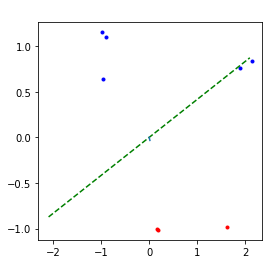

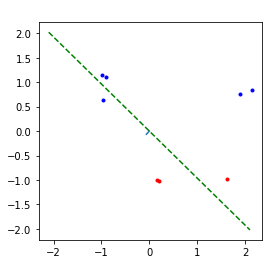

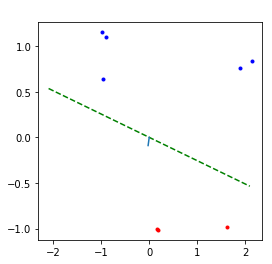

Treinamento Concluído
-------------------------------------
Amostra 3:


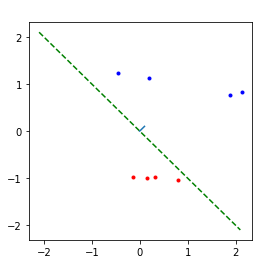

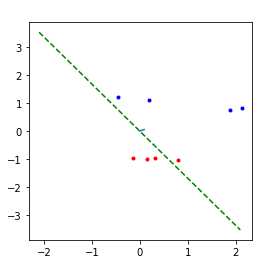

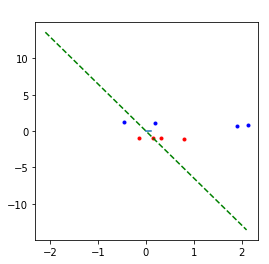

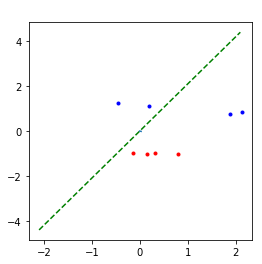

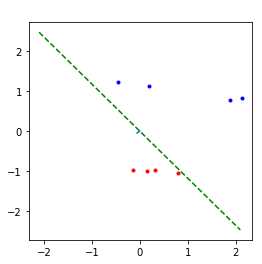

Treinamento Concluído
-------------------------------------
Amostra 4:


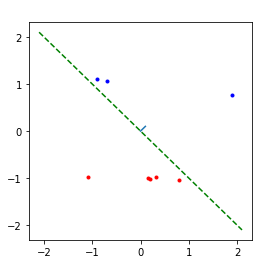

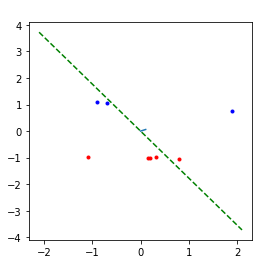

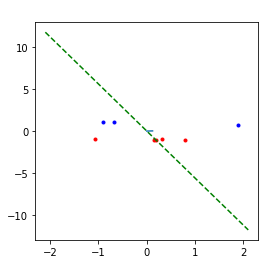

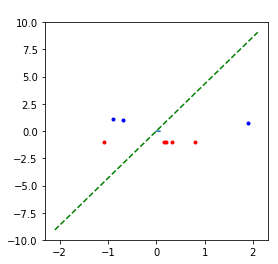

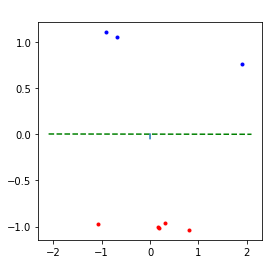

Treinamento Concluído
-------------------------------------
Amostra 5:


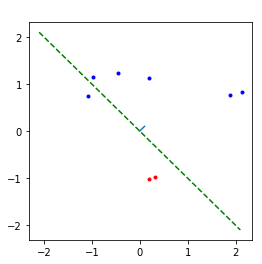

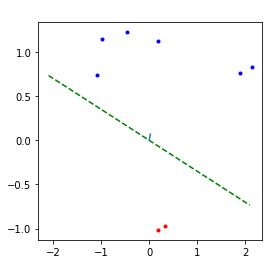

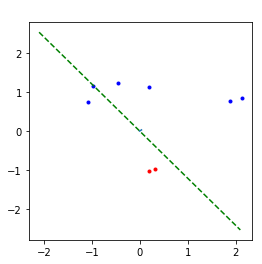

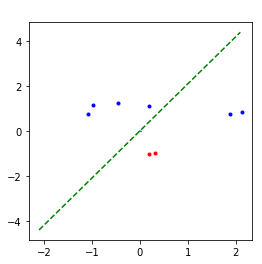

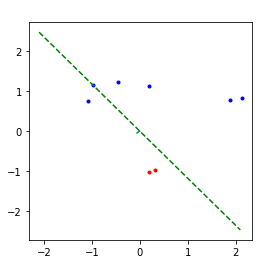

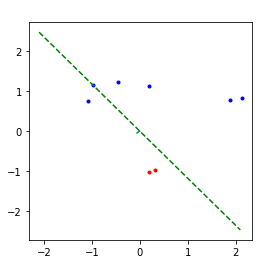

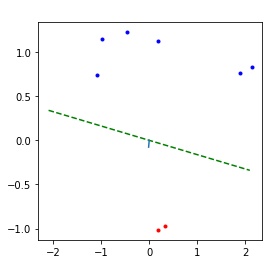

Treinamento Concluído
-------------------------------------


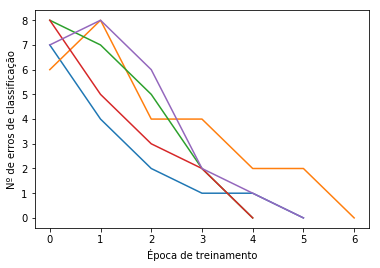

In [11]:
w = [0,0]
n_amostras = 8
vet_ent = np.empty([n_amostras,3])   #Vetor de amostras de entrada
vet_erros = [] #lista de erros por etapa

#Geração de amostras e treinamento da rede para fator de aprendizagem = 0.02
for n in range(5):
    k=0
    print('Amostra {}:'.format(n+1))
    for i in random.sample(range(0,19), n_amostras):    
        vet_ent[k] = Entrada_norm[i]                
        k += 1
    ret = treinar(w, vet_ent, 0.02, True, True)
    vet_erros.append(8-ret[1])
    print('Treinamento Concluído\n-------------------------------------')

#Gerando o gráfico de desempenho da rede
plt.plot(vet_erros[0])
plt.plot(vet_erros[1])
plt.plot(vet_erros[2])
plt.plot(vet_erros[3])
plt.plot(vet_erros[4])

plt.xlabel('Época de treinamento')
plt.ylabel('Nº de erros de classificação')
plt.title('')

plt.show()

Percebe-se que para valores de $\eta$ muito pequenos a rede demora mais tempo para ser treinada, visto que a velocidade de rotação do vetor de pesos é reduzida. Para valores mais altos a rotação é mais rápida, treinando a rede com uma velocidade maior, porém um valor muito alto de $\eta$ pode tornar o treinamento instável.

## 2.6 Teste da rede neural para novas amostras

Inicialmente a rede neural é treinada utilizando todas as 20 amostras de carros:

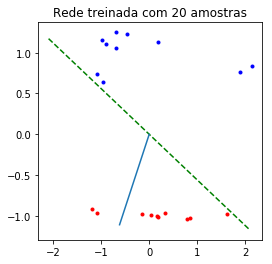

In [43]:
w1 = treinar([0, 0], Entrada_norm, 0.3, False, False)[0] # Pesos com a rede treinada
plotarSeparacao(Entrada_norm, w1, 'Rede treinada com 20 amostras')

Novas amostras de carros:

In [47]:
Carros_novos = np.empty((20,3))

#Ford Fusion:
Carros_novos[0] = [44660, 104000, -1]
Carros_novos[1] = [20860, 117800, -1]
Carros_novos[2] = [20000, 118000, -1]
Carros_novos[3] = [19000, 118990, -1]
Carros_novos[4] = [20100, 120900, -1]
Carros_novos[5] = [16000, 125000, -1]
Carros_novos[6] = [30000, 125000, -1]
Carros_novos[7] = [12000, 129900, -1]
Carros_novos[8] = [7000, 130990, -1]
Carros_novos[9] = [9700, 119000, -1]

#Fiat Uno
Carros_novos[10] = [19000, 27990, 1]
Carros_novos[11] = [28000, 30490, 1]
Carros_novos[12] = [35000, 30580, 1]
Carros_novos[13] = [37600, 30790, 1]
Carros_novos[14] = [14000, 30900, 1]
Carros_novos[15] = [66000, 31160, 1]
Carros_novos[16] = [65000, 31000, 1]
Carros_novos[17] = [44000, 31350, 1]
Carros_novos[18] = [45000, 31490, 1]
Carros_novos[19] = [47500, 31490, 1]

#Normalização dos dados:
Carros_novos_norm = np.empty((20, 3))
Carros_novos_norm[:, 0] = (Carros_novos[:, 0] - Entrada_media[0]) / Entrada_desvPad[0]
Carros_novos_norm[:, 1] = (Carros_novos[:, 1] - Entrada_media[1]) / Entrada_desvPad[1]
Carros_novos_norm[:, 2] = Carros_novos[:, 2]

Testando os novos dados normalizados na rede neural

In [51]:
saida = []
for k in range(0, len(Carros_novos)):
    saida.append(encontrar_saida(w1, Carros_novos_norm[k]))
    if saida[k] == 1:
        print("Carro {}: Fiat Uno".format(k+1))
    else:
        print("Carro {}: Ford Fusion".format(k+1))


Carro 1: Ford Fusion
Carro 2: Ford Fusion
Carro 3: Ford Fusion
Carro 4: Ford Fusion
Carro 5: Ford Fusion
Carro 6: Ford Fusion
Carro 7: Ford Fusion
Carro 8: Ford Fusion
Carro 9: Ford Fusion
Carro 10: Ford Fusion
Carro 11: Fiat Uno
Carro 12: Fiat Uno
Carro 13: Fiat Uno
Carro 14: Fiat Uno
Carro 15: Fiat Uno
Carro 16: Ford Fusion
Carro 17: Ford Fusion
Carro 18: Fiat Uno
Carro 19: Ford Fusion
Carro 20: Ford Fusion


De todas as 20 amostras, 16 foram classificadas corretamente. Os Ford Fusion foram todos classificados corretamente. Os Fiat Uno que foram classificados como Ford Fusion foram classificados desta forma devido à sua alta quilometragem. Como a rede neural foi treinada com carros de quilometragem mais baixa houve problemas na identificação dos carros com quilometragem mais alta.

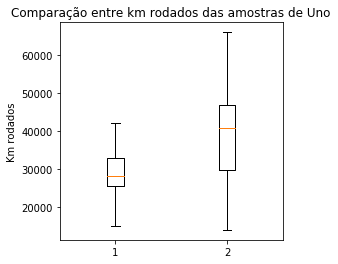

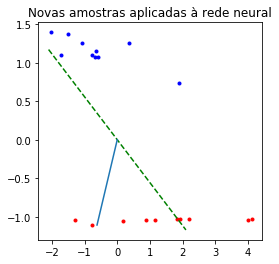

In [77]:
plt.figure(figsize=(4,4))
plt.title('Comparação entre km rodados das amostras de Uno')
plt.boxplot(np.append(np.transpose([Carro2[:,0]]), np.transpose([Carros_novos[10:,0]]), axis=1))
plt.ylabel('Km rodados')
plt.show()

plotarSeparacao(Carros_novos_norm, w1, 'Novas amostras aplicadas à rede neural')

Caso os pesos retornados pelo treinamento da rede neural fossem obtidos de forma a deixar a reta de separação mais horizontal a capacidade de identificação da rede melhoraria bastante.